# 1. Leaky Aquifer Test - Dalem Example
**This example is taken from Kruseman et al. (1970)**

### Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ttim as ttm

plt.rcParams["figure.figsize"] = [5, 3]

### Introduction and Conceptual Model

In many situations, we cannot ignore the leakage potential of overlying and underlying formations to aquifers, and we cannot conceptualize them as confined. TTim is capable of modelling and adjusting parameters to leaky, semi-confined aquifers.

The current is the pumping test from Dalem (Kruseman et al., 1970), the Netherlands. The hydrogeological cross-section is composed of the following elements: an initial 8 m deep aquitard layer, followed by an aquifer from 8 m to 45 m depth. The layer underlying the aquifer is considered an aquiclude. The pumping well is placed at the aquifer, and drawdown is recorded at four different piezometers, 30, 60, 90 and 120 m away from the well. The pumping lasted 8 hours in total at a rate of 761 m$^3$/d. There is a river 1500 m away from the well. The tide affects both river and well levels. Data has been previously corrected for the tide effect.

In this benchmarking exercise, we will simulate two different conceptual models. The first model assumes no storage in the aquitard. That matches most analytical solutions for leaky-aquitard (Kruseman et al., 1970). In the second model, we will explore TTim's flexibility for modelling and add storage as an additional parameter to be adjusted. Finally, we compare the results of the models with other software.

The figures below resume the conceptual models:



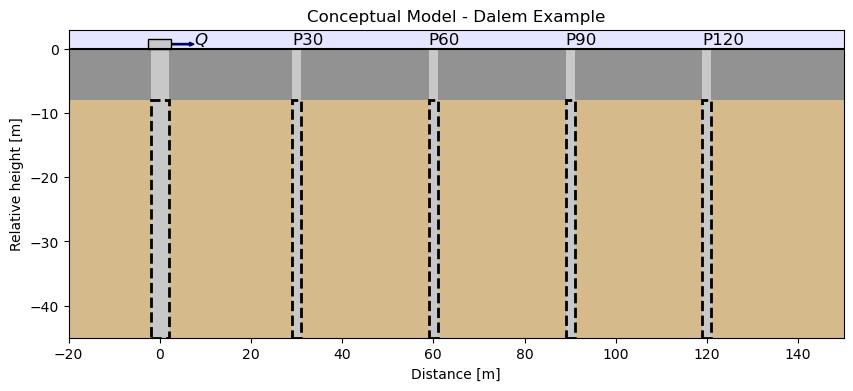

In [2]:
# Conceptual Model 1
import matplotlib.pyplot as plt

##Now printing the conceptual model figure:

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
# sky
sky = plt.Rectangle((-20, 0), width=170, height=3, fc="b", zorder=0, alpha=0.1)
ax.add_patch(sky)

# Aquifer:
ground = plt.Rectangle(
    (-20, -45),
    width=170,
    height=37,
    fc=np.array([209, 179, 127]) / 255,
    zorder=0,
    alpha=0.9,
)
ax.add_patch(ground)

# Confining bed:
confining_unit = plt.Rectangle(
    (-20, -8),
    width=170,
    height=8,
    fc=np.array([100, 100, 100]) / 255,
    zorder=0,
    alpha=0.7,
)
ax.add_patch(confining_unit)

well = plt.Rectangle(
    (-2, -45), width=4, height=45, fc=np.array([200, 200, 200]) / 255, zorder=1
)
ax.add_patch(well)

# Wellhead
wellhead = plt.Rectangle(
    (-2.5, 0), width=5, height=1.5, fc=np.array([200, 200, 200]) / 255, zorder=2, ec="k"
)
ax.add_patch(wellhead)

# Screen for the well:
screen = plt.Rectangle(
    (-2, -45),
    width=4,
    height=37,
    fc=np.array([200, 200, 200]) / 255,
    alpha=1,
    zorder=2,
    ec="k",
    ls="--",
)
screen.set_linewidth(2)
ax.add_patch(screen)
pumping_arrow = plt.Arrow(x=2.5, y=0.75, dx=5, dy=0, color="#00035b")
ax.add_patch(pumping_arrow)
ax.text(x=7.5, y=0.75, s=r"$ Q$", fontsize="large")
# Piezometers
piez1 = plt.Rectangle(
    (29, -45), width=2, height=45, fc=np.array([200, 200, 200]) / 255, zorder=1
)
screen_piez_1 = plt.Rectangle(
    (29, -45),
    width=2,
    height=37,
    fc=np.array([200, 200, 200]) / 255,
    alpha=1,
    zorder=2,
    ec="k",
    ls="--",
)
screen_piez_1.set_linewidth(2)

piez2 = plt.Rectangle(
    (59, -45), width=2, height=45, fc=np.array([200, 200, 200]) / 255, zorder=1
)
screen_piez_2 = plt.Rectangle(
    (59, -45),
    width=2,
    height=37,
    fc=np.array([200, 200, 200]) / 255,
    alpha=1,
    zorder=2,
    ec="k",
    ls="--",
)
screen_piez_2.set_linewidth(2)

piez3 = plt.Rectangle(
    (89, -45), width=2, height=45, fc=np.array([200, 200, 200]) / 255, zorder=1
)
screen_piez_3 = plt.Rectangle(
    (89, -45),
    width=2,
    height=37,
    fc=np.array([200, 200, 200]) / 255,
    alpha=1,
    zorder=2,
    ec="k",
    ls="--",
)
screen_piez_3.set_linewidth(2)

piez4 = plt.Rectangle(
    (119, -45), width=2, height=45, fc=np.array([200, 200, 200]) / 255, zorder=1
)
screen_piez_4 = plt.Rectangle(
    (119, -45),
    width=2,
    height=37,
    fc=np.array([200, 200, 200]) / 255,
    alpha=1,
    zorder=2,
    ec="k",
    ls="--",
)
screen_piez_4.set_linewidth(2)

ax.add_patch(piez1)
ax.add_patch(screen_piez_1)
ax.add_patch(piez2)
ax.add_patch(screen_piez_2)
ax.add_patch(piez3)
ax.add_patch(screen_piez_3)
ax.add_patch(piez4)
ax.add_patch(screen_piez_4)

# last line
line = plt.Line2D(xdata=[-200, 1200], ydata=[0, 0], color="k")
ax.add_line(line)

ax.text(x=29, y=0.75, s="P30", fontsize="large")
ax.text(x=59, y=0.75, s="P60", fontsize="large")
ax.text(x=89, y=0.75, s="P90", fontsize="large")
ax.text(x=119, y=0.75, s="P120", fontsize="large")


ax.set_xlim([-20, 150])
ax.set_ylim([-45, 3])
ax.set_xlabel("Distance [m]")
ax.set_ylabel("Relative height [m]")
ax.set_title("Conceptual Model - Dalem Example");

### Set basic parameters

In [3]:
H = 37  # aquifer thickness, m
zt = -8  # top boundary of aquifer, m
zb = zt - H  # bottom boundary of the aquifer, m
Q = 761  # constant pumping rate, m^3/d
t = 0.34  # total pumping time, d

### Create conceptual model

Until so far, we have only considered impermeable upper boundaries in our model. This assumption, however, is not sufficient in many situations where there is enough leakage from above to influence flow results. TTim can simulate such semi-confined conditions in ```ModelMaq``` setup with the parameter: ```topboundary = 'semi'```.

When we do this, ModelMaq assumes a leaky layer is on top of the uppermost aquifer. A leaky layer in TTim only has vertical flow and is characterized by the parameters resistance to vertical flow (```c```) and storage (```Sll```). The specific flux is computed as (Bakker, 2013):

$$q_n = \frac{h_n-h_{n-1}}{c_n}$$

where $q_n$ is the vertical flux from layer $n$ to layer $n-1$, $h_n$ is the head in layer $n$ and $c_n$ is the vertical resistance to flow. $c_n$ is computed as: $H_n/k_n$ where, $H_n$ is the leaky-layer thickness and $k_n$ the vertical hydraulic conductance. $c_n$ is the inverse of the parameter Leakance ($L_n = 1/c_n$), that is used in MODFLOW (Harbaugh, 2005) or analytical solutions of leaky-layers, such as in Hantush (1955).

Specifying ```topboundary = 'semi'``` means that we also have to set the parameters for the aquitard overlying the aquifer formation. Thus, even though we have only one aquifer, we have to set an additional element to the ```z``` array, which is the top of the aquitard formation:
* ```z = [0,zt,zb]```: 0 is the depth of the aquitard overlying the aquifer, zt and zb are the top and bottom of the aquifer

In this first example, we also have to set the resistance of the aquitard:
* ```c = 500```: We will calibrate this value later.

For now, we are ignoring the storage of this leaky layer. In this case, TTim will consider the head remains fixed above the leaky layer.


More explanations over how TTim sets up the ModelMaq model can be seen in the notebooks:
- [Confined 1 - Oude Korendijk](confined1_oude_korendijk)
- [Confined 4 - Schroth](confined4_schroth.ipynb)


In [4]:
# unkonwn parameters: kaq, Saq, c
ml = ttm.ModelMaq(
    kaq=10, z=[0, zt, zb], c=500, Saq=0.001, topboundary="semi", tmin=0.01, tmax=1
)
w = ttm.Well(ml, xw=0, yw=0, tsandQ=[(0, Q), (0.34, 0)])
ml.solve(silent="True")

### Load data of four observation wells.

The data for each observation well is organized in text files where the first column is the time data in days and the second is the drawdown in meters, corrected for the tide effect. Here we are also declaring the distance from the pumping well:

In [5]:
# data of observation well 30 m away from pumping well
data1 = np.loadtxt("data/dalem_p30.txt", skiprows=1)
t1 = data1[:, 0]
h1 = data1[:, 1]
r1 = 30
# data of observation well 60 m away from pumping well
data2 = np.loadtxt("data/dalem_p60.txt", skiprows=1)
t2 = data2[:, 0]
h2 = data2[:, 1]
r2 = 60
# data of observation well 90 m away from pumping well
data3 = np.loadtxt("data/dalem_p90.txt", skiprows=1)
t3 = data3[:, 0]
h3 = data3[:, 1]
r3 = 90
# data of observation well 120 m away from pumping well
data4 = np.loadtxt("data/dalem_p120.txt", skiprows=1)
t4 = data4[:, 0]
h4 = data4[:, 1]
r4 = 120

## Step 5. Model Calibration

### Step 5.1. Calibration with three datasets (excluding one piezometer at a time)

We begin investigating the model calibration if we exclude one piezometer at a time. Hence, we look into the influence of each piezometer on parameter calibration.

#### 5.1.1. Calibration without obs1

In [6]:
ca1 = ttm.Calibrate(ml)
ca1.set_parameter(name="kaq0", initial=10, pmin=1, pmax=100)
ca1.set_parameter(name="Saq0", initial=1e-4, pmin=1e-5, pmax=1e-3)
ca1.set_parameter(name="c0", initial=100, pmin=20, pmax=1e5)
ca1.series(name="obs2", x=r2, y=0, layer=0, t=t2, h=h2)
ca1.series(name="obs3", x=r3, y=0, layer=0, t=t3, h=h3)
ca1.series(name="obs4", x=r4, y=0, layer=0, t=t4, h=h4)
ca1.fit()
ca1.parameters.loc[:, ["optimal"]]

.............................................................
Fit succeeded.


,optimal
kaq0,57.518169
Saq0,0.000033
c0,99999.251516


rmse: 0.0032364781024496318


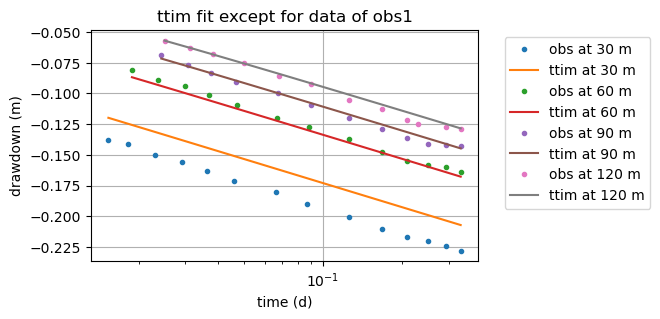

In [7]:
print("rmse:", ca1.rmse())
ha1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, ha1[0], label="ttim at 30 m")
ha2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, ".", label="obs at 60 m")
plt.semilogx(t2, ha2[0], label="ttim at 60 m")
ha3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, ".", label="obs at 90 m")
plt.semilogx(t3, ha3[0], label="ttim at 90 m")
ha4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, ".", label="obs at 120 m")
plt.semilogx(t4, ha4[0], label="ttim at 120 m")
plt.xlabel("time (d)")
plt.ylabel("drawdown (m)")
plt.title("ttim fit except for data of obs1")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

#### 5.1.2. Calibration without obs2

In [8]:
ca2 = ttm.Calibrate(ml)
ca2.set_parameter(name="kaq0", initial=10, pmin=1, pmax=100)
ca2.set_parameter(name="Saq0", initial=1e-4, pmin=1e-5, pmax=1e-3)
ca2.set_parameter(name="c0", initial=1000, pmin=100, pmax=1e6)
ca2.series(name="obs1", x=r1, y=0, layer=0, t=t1, h=h1)
ca2.series(name="obs3", x=r3, y=0, layer=0, t=t3, h=h3)
ca2.series(name="obs4", x=r4, y=0, layer=0, t=t4, h=h4)
ca2.fit()
ca2.parameters.loc[:, ["optimal"]]

..................................................................
Fit succeeded.


,optimal
kaq0,45.026406
Saq0,0.000044
c0,349.137815


rmse: 0.002633409812082637


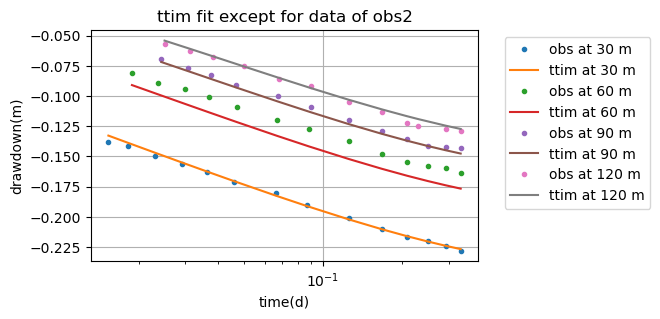

In [9]:
print("rmse:", ca2.rmse())
hb1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, hb1[0], label="ttim at 30 m")
hb2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, ".", label="obs at 60 m")
plt.semilogx(t2, hb2[0], label="ttim at 60 m")
hb3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, ".", label="obs at 90 m")
plt.semilogx(t3, hb3[0], label="ttim at 90 m")
hb4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, ".", label="obs at 120 m")
plt.semilogx(t4, hb4[0], label="ttim at 120 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim fit except for data of obs2")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

#### 5.1.3. Calibration without obs3

In [10]:
ca3 = ttm.Calibrate(ml)
ca3.set_parameter(name="kaq0", initial=10, pmin=1, pmax=100)
ca3.set_parameter(name="Saq0", initial=1e-4, pmin=1e-5, pmax=1e-3)
ca3.set_parameter(name="c0", initial=1000, pmin=100, pmax=1e6)
ca3.series(name="obs1", x=r1, y=0, layer=0, t=t1, h=h1)
ca3.series(name="obs3", x=r2, y=0, layer=0, t=t2, h=h2)
ca3.series(name="obs4", x=r4, y=0, layer=0, t=t4, h=h4)
ca3.fit()
ca3.parameters.loc[:, ["optimal"]]

..........................................................
Fit succeeded.


,optimal
kaq0,45.205064
Saq0,0.000048
c0,318.733682


rmse: 0.006725845119530934


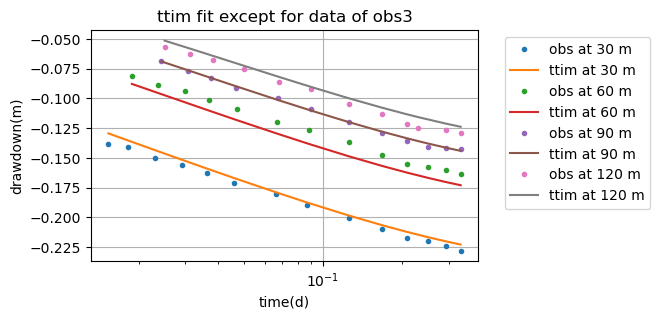

In [11]:
print("rmse:", ca3.rmse())
hc1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, hc1[0], label="ttim at 30 m")
hc2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, ".", label="obs at 60 m")
plt.semilogx(t2, hc2[0], label="ttim at 60 m")
hc3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, ".", label="obs at 90 m")
plt.semilogx(t3, hc3[0], label="ttim at 90 m")
hc4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, ".", label="obs at 120 m")
plt.semilogx(t4, hc4[0], label="ttim at 120 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim fit except for data of obs3")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

#### 5.1.4. Calibration without obs4

In [12]:
ca4 = ttm.Calibrate(ml)
ca4.set_parameter(name="kaq0", initial=10, pmin=1, pmax=100)
ca4.set_parameter(name="Saq0", initial=1e-4, pmin=1e-5, pmax=1e-3)
ca4.set_parameter(name="c0", initial=1000, pmin=100, pmax=1e6)
ca4.series(name="obs1", x=r1, y=0, layer=0, t=t1, h=h1)
ca4.series(name="obs3", x=r2, y=0, layer=0, t=t2, h=h2)
ca4.series(name="obs4", x=r3, y=0, layer=0, t=t3, h=h3)
ca4.fit()
ca4.parameters.loc[:, ["optimal"]]

....................................
Fit succeeded.


,optimal
kaq0,41.720982
Saq0,0.000058
c0,180.960620


rmse: 0.005405897973686629


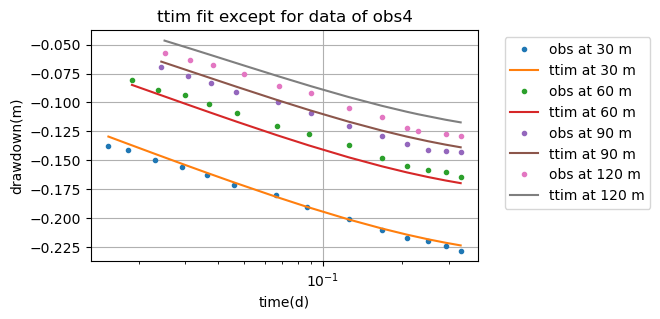

In [13]:
print("rmse:", ca4.rmse())
hd1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, hd1[0], label="ttim at 30 m")
hd2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, ".", label="obs at 60 m")
plt.semilogx(t2, hd2[0], label="ttim at 60 m")
hd3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, ".", label="obs at 90 m")
plt.semilogx(t3, hd3[0], label="ttim at 90 m")
hd4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, ".", label="obs at 120 m")
plt.semilogx(t4, hd4[0], label="ttim at 120 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim fit except for data of obs4")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

#### 5.1.4. Summary of results of the simulations missing one observation

In [14]:
t = pd.DataFrame(
    columns=["k [m/d]", "Ss [1/m]", "c [d]"],
    index=[
        "Data at 30 m removed",
        "Data at 60 m removed",
        "Data at 90 m removed",
        "Data at 120 m removed",
    ],
)
t.loc["Data at 30 m removed"] = ca1.parameters["optimal"].values
t.loc["Data at 60 m removed"] = ca2.parameters["optimal"].values
t.loc["Data at 90 m removed"] = ca3.parameters["optimal"].values
t.loc["Data at 120 m removed"] = ca4.parameters["optimal"].values
rmse = [ca1.rmse(), ca2.rmse(), ca3.rmse(), ca4.rmse()]
t["RMSE"] = rmse
t

,k [m/d],Ss [1/m],c [d],RMSE
Data at 30 m removed,57.518169,0.000033,99999.251516,0.003236
Data at 60 m removed,45.026406,0.000044,349.137815,0.002633
Data at 90 m removed,45.205064,0.000048,318.733682,0.006726
Data at 120 m removed,41.720982,0.000058,180.96062,0.005406


The values for hydraulic conductivity and specific storage changed slightly for every simulation. However, the resistance of the aquitard layer varied significantly, indicating that this parameter is not uniform in the region investigated.

### Step 5.2. Calibrate with four datasets simultaneously:

Now we calibrate the same model but with all four observation wells considered.

In [15]:
# unkonwn parameters: kaq, Saq, c
m_1 = ttm.ModelMaq(
    kaq=10, z=[0, zt, zb], c=500, Saq=0.001, topboundary="semi", tmin=0.01, tmax=1
)
w_1 = ttm.Well(m_1, xw=0, yw=0, tsandQ=[(0, Q), (0.34, 0)])
m_1.solve(silent="True")

In [16]:
c0 = ttm.Calibrate(ml)
c0.set_parameter(name="kaq0", initial=10)
c0.set_parameter(name="Saq0", initial=1e-4)
c0.set_parameter(name="c0", initial=500, pmin=0)
c0.series(name="obs1", x=30, y=0, t=t1, h=h1, layer=0)
c0.series(name="obs2", x=60, y=0, t=t2, h=h2, layer=0)
c0.series(name="obs3", x=90, y=0, t=t3, h=h3, layer=0)
c0.series(name="obs4", x=120, y=0, t=t4, h=h4, layer=0)
c0.fit()
c0.parameters.loc[:, ["optimal"]]

.......................................
Fit succeeded.


,optimal
kaq0,45.332100
Saq0,0.000048
c0,331.186391


rmse: 0.005916842158003594


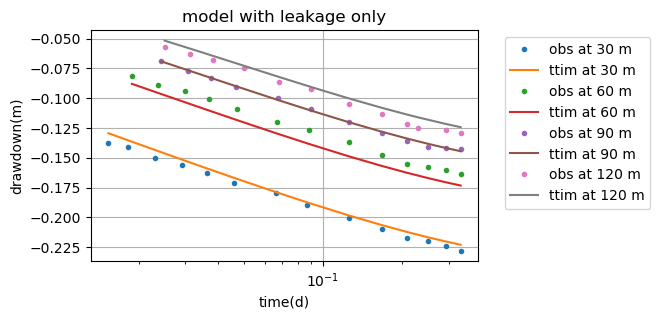

In [17]:
hm_11 = ml.head(r1, 0, t1)
hm_12 = ml.head(r2, 0, t2)
hm_13 = ml.head(r3, 0, t3)
hm_14 = ml.head(r4, 0, t4)
print("rmse:", c0.rmse())
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, hm_11[0], label="ttim at 30 m")
plt.semilogx(t2, h2, ".", label="obs at 60 m")
plt.semilogx(t2, hm_12[0], label="ttim at 60 m")
plt.semilogx(t3, h3, ".", label="obs at 90 m")
plt.semilogx(t3, hm_13[0], label="ttim at 90 m")
plt.semilogx(t4, h4, ".", label="obs at 120 m")
plt.semilogx(t4, hm_14[0], label="ttim at 120 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("model with leakage only")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

The overall fit is relatively good. Comparing the new model to the three previous models, the adjusted parameters seem to be in between the previously computed values.

## Step 6. Alternative  Model Aquitard with leakage & storage

The second conceptualization for the Dalem test is to consider the storage in the aquitard. Hence, we define the ```Sll``` parameter in the model building class ModelMaq:

In [18]:
# unkonwn parameters: kaq, Saq, c, Sll
m_2 = ttm.ModelMaq(
    kaq=10,
    z=[0, zt, zb],
    c=500,
    Saq=0.001,
    Sll=0.001,
    topboundary="semi",
    tmin=0.01,
    tmax=1,
)
w_2 = ttm.Well(m_2, xw=0, yw=0, tsandQ=[(0, Q), (0.34, 0)])
m_2.solve(silent="True")

## Step 7. Calibration of Alternative Model

We follow the same previous steps for calibration, but now we add the additional `Sll` parameter.

In [19]:
## Check why the errors in the pmin of the Sll adjustment
c1 = ttm.Calibrate(m_2)
c1.set_parameter(name="kaq0", initial=10)
c1.set_parameter(name="Saq0", initial=1e-4, pmin=0)
c1.set_parameter(name="c0", initial=500, pmin=0, pmax=1000)
c1.set_parameter(name="Sll0", initial=1e-6, pmin=1e-12, pmax=0.01)
c1.series(name="obs1", x=30, y=0, t=t1, h=h1, layer=0)
c1.series(name="obs2", x=60, y=0, t=t2, h=h2, layer=0)
c1.series(name="obs3", x=90, y=0, t=t3, h=h3, layer=0)
c1.series(name="obs4", x=120, y=0, t=t4, h=h4, layer=0)
c1.fit()
c1.parameters.loc[:, ["optimal"]]

........................................................................................................................................................................................................................................................
Fit succeeded.


,optimal
kaq0,38.809849
Saq0,0.000048
c0,190.775426
Sll0,0.000365


rmse: 0.007808425055990944


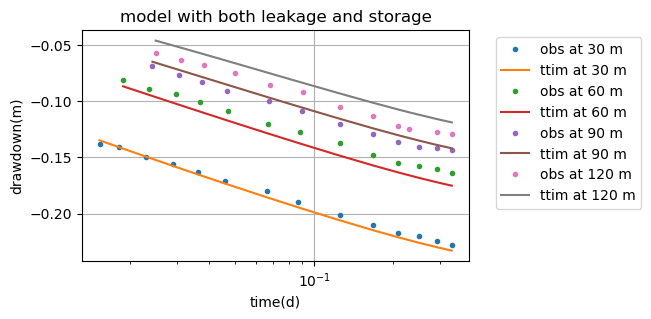

In [20]:
hm_21 = m_2.head(r1, 0, t1)
hm_22 = m_2.head(r2, 0, t2)
hm_23 = m_2.head(r3, 0, t3)
hm_24 = m_2.head(r4, 0, t4)
print("rmse:", c1.rmse())
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, hm_21[0], label="ttim at 30 m")
plt.semilogx(t2, h2, ".", label="obs at 60 m")
plt.semilogx(t2, hm_22[0], label="ttim at 60 m")
plt.semilogx(t3, h3, ".", label="obs at 90 m")
plt.semilogx(t3, hm_23[0], label="ttim at 90 m")
plt.semilogx(t4, h4, ".", label="obs at 120 m")
plt.semilogx(t4, hm_24[0], label="ttim at 120 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("model with both leakage and storage")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

It is very difficult to find one set of optimal parameters. Different optimal parameters are found for different initial values. 

## Step 9. Analysis and summary of values simulated by different models

Here we compare the simulations done with TTim with other software and the values reported in Kruseman and de Ridder (1970). The published values were determined by graphical adjustment to the Hantush family of type curves (Hantush, 1955). To compare the results reported in the literature with different models, we begin by analysing the values obtained without storage.
Alongside with TTim and literature values, we report the values MLU (Carlson & Randall, 2012) and AQTESOLV (Duffield, 2007) models, reported by Xinzhu (2020)

### Step 9.1. Comparison of results of models without storage

In [21]:
t1 = pd.DataFrame(
    columns=["k [m/d]", "Ss [1/m]", "c [d]", "Sll [1/m]"],
    index=[
        "Hantush",
        "ttim - semi-confined",
        "MLU",
        "AQTESOLV",
    ],
)
t1.loc["Hantush"] = [45.332, 4.762e-5, 331.141, "-"]
t1.loc["ttim - semi-confined"] = np.append(c0.parameters["optimal"].values, "-")
t1.loc["MLU"] = [45.186, 3.941e-05, 769.200, 3.611e-04]
t1.loc["AQTESOLV"] = [49.286, 4.559e-05, 745.156, "-"]
rmse = [0.005917, c0.rmse(), 0.005941, 0.007245]
t1["RMSE [m]"] = rmse
t1

,k [m/d],Ss [1/m],c [d],Sll [1/m],RMSE [m]
Hantush,45.332,0.000048,331.141,-,0.005917
ttim - semi-confined,45.33209994682948,4.7622499266704035e-05,331.18639103690293,-,0.005917
MLU,45.186,0.000039,769.2,0.000361,0.005941
AQTESOLV,49.286,0.000046,745.156,-,0.007245


### Step 9.2. Comparison of results of models with storage


In [22]:
t2 = pd.DataFrame(
    columns=["k [m/d]", "Ss [1/m]", "c [d]", "Sll [1/m]"],
    index=["ttim - semi-confined", "MLU", "AQTESOLV"],
)
t2.loc["MLU"] = [45.335, 4.668e-05, 331.400, 1.284e-05]
t2.loc["AQTESOLV"] = [45.159, 4.100e-05, 367.577, 2.868e-05]
t2.loc["ttim - semi-confined"] = c1.parameters["optimal"].values
t2["RMSE [m]"] = [c1.rmse(), 0.004941, 0.005861]
t2

,k [m/d],Ss [1/m],c [d],Sll [1/m],RMSE [m]
ttim - semi-confined,38.809849,0.000048,190.775426,0.000365,0.007808
MLU,45.335,0.000047,331.4,0.000013,0.004941
AQTESOLV,45.159,0.000041,367.577,0.000029,0.005861


Overall, all models found similar K values for the aquifer. TTim models differed significantly from the MLU and AQTESOLV solutions for the aquitard storage and resistance.

## References

* Bakker, M. Semi-analytic modeling of transient multi-layer flow with TTim. Hydrogeol J 21, 935–943 (2013). https://doi.org/10.1007/s10040-013-0975-2
* Carlson F, Randall J (2012) MLU: a Windows application for the analysis of aquifer tests and the design of well fields in layered systems. Ground Water 50(4):504–510
* Duffield, G.M., 2007. AQTESOLV for Windows Version 4.5 User's Guide, HydroSOLVE, Inc., Reston, VA.
* Newville, M.,Stensitzki, T., Allen, D.B., Ingargiola, A. (2014) LMFIT: Non Linear Least-Squares Minimization and Curve Fitting for Python.https://dx.doi.org/10.5281/zenodo.11813. https://lmfit.github.io/lmfit-py/intro.html (last access: August,2021).
* Yang, Xinzhu (2020) Application and comparison of different methodsfor aquifer test analysis using TTim. Master Thesis, Delft University of Technology (TUDelft), Delft, The Netherlands.